## 1导入库

In [3]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [15]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

### 2摄像头，使用mediapipe

In [83]:
mp_holistic =mp.solutions.holistic #holistic model
mp_drawing =mp.solutions.drawing_utils # Drawing utilities

In [84]:
def mediapipe_detection(image,model):
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    results =model.process(image)
    image.flags.writeable =True
    image =cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [85]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [86]:
def draw_styled_landmarks(image, results):
    # 绘制面部连接
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    # 绘制姿势连接
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4))

    # 绘制左手连接
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

    # 绘制右手连接|
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

In [87]:
cap = cv2.VideoCapture(0)

# 设置 mediapipe 模型
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        # 进行检测
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(frame,results)
        print(results)
        cv2.imshow('OpenCV Feed', frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  # 正确的拼写是 destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [78]:
cap.release()
cv2.destroyAllWindows()  # 正确的拼写是 destroyAllWindows()

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

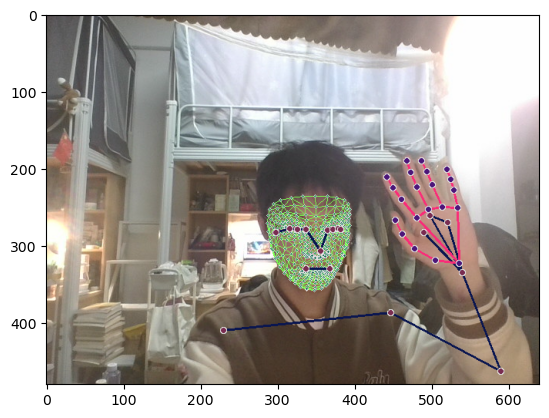

In [88]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

### 3提取要点

In [12]:
results.pose_landmarks.landmark[0].visibility

0.9999305605888367

In [13]:
pose=[]
for res in results.pose_landmarks.landmark:
    test =np.array([res.x,res.y,res.z,res.visibility]).flatten()
    pose.append(test)
    

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)  # 33个关键点，每个点有x, y, z, visibility

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)  # 假设有468个面部关键点，每个点有x, y, z

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  # 21个手部关键点，每个点有x, y, z

rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)  # 21个手部关键点，每个点有x, y, z


In [15]:
def extract_keypoints(results):  #提取特征
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)  # 33个关键点，每个点有x, y, z, visibility

    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)  # 假设有468个面部关键点，每个点有x, y, z
    
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  # 21个手部关键点，每个点有x, y, z
    
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)  # 21个手部关键点，每个点有x, y, z
    return np.concatenate([pose,face,lh,rh])

In [16]:
extract_keypoints(results)  #468*3+33*4+21*3+21*3=1662


array([ 0.51064819,  0.69524008, -0.60711497, ...,  0.        ,
        0.        ,  0.        ])

### 4为数据收集设置文件夹

In [19]:
#动作检测
#动作检测与其他计算机视觉任务的一个区别是，检测使用的是数据序列，而不是单个帧。
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('手语数据集')  # 用正确的引号
# Actions that we try to detect
actions = np.array(['你好', '谢谢', '对不起','可以','帮助','玩'])  # 用正确的引号和括号
# Thirty videos worth of data
no_sequences = 65
# Videos are going to be 30 frames in length
sequence_length = 40

In [35]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            # 创建子文件夹
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass  # 如果文件夹已经存在，则跳过创建

In [33]:
#删除文件夹
import shutil

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('手语数据集')  # 数据存储路径

# Actions to delete
actions_to_remove = ['你好', '谢谢', '对不起','可以','帮助','玩']  # 要删除的动作列表

# 删除文件夹及其内容
for action in actions_to_remove:
    folder_path = os.path.join(DATA_PATH, action)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)  # 删除整个文件夹
        print(f"已删除动作数据文件夹: {folder_path}")
    else:
        print(f"未找到数据文件夹: {folder_path}")


已删除动作数据文件夹: 手语数据集\你好
已删除动作数据文件夹: 手语数据集\谢谢
已删除动作数据文件夹: 手语数据集\对不起
已删除动作数据文件夹: 手语数据集\可以
已删除动作数据文件夹: 手语数据集\帮助
已删除动作数据文件夹: 手语数据集\玩


In [158]:
import os
import shutil

# ... (其他代码) ...

# 要删除的子目录
subdirs_to_remove = ['50', '51']

# 删除文件夹及其内容
for action in actions_to_remove:
    folder_path = os.path.join(DATA_PATH, action)
    if os.path.exists(folder_path):
        # 循环遍历要删除的子目录
        for subdir in subdirs_to_remove:
            subdir_path = os.path.join(folder_path, subdir)
            if os.path.exists(subdir_path):
                shutil.rmtree(subdir_path)  # 删除子目录
                print(f"已删除子目录: {subdir_path}")
            else:
                print(f"未找到子目录: {subdir_path}")
        print(f"已处理动作数据文件夹: {folder_path}")
    else:
        print(f"未找到数据文件夹: {folder_path}")

已删除子目录: 手语数据集\你好\50
已删除子目录: 手语数据集\你好\51
已处理动作数据文件夹: 手语数据集\你好
已删除子目录: 手语数据集\谢谢\50
已删除子目录: 手语数据集\谢谢\51
已处理动作数据文件夹: 手语数据集\谢谢
已删除子目录: 手语数据集\对不起\50
已删除子目录: 手语数据集\对不起\51
已处理动作数据文件夹: 手语数据集\对不起
已删除子目录: 手语数据集\可以\50
已删除子目录: 手语数据集\可以\51
已处理动作数据文件夹: 手语数据集\可以
已删除子目录: 手语数据集\帮助\50
已删除子目录: 手语数据集\帮助\51
已处理动作数据文件夹: 手语数据集\帮助
已删除子目录: 手语数据集\玩\50
已删除子目录: 手语数据集\玩\51
已处理动作数据文件夹: 手语数据集\玩


In [21]:
# 添加新动作
new_actions = np.array(['早上好', '晚上好'])
actions = np.concatenate((actions, new_actions))


In [146]:
for action in actions:
        # Loop through sequences aka videos
        action_path = os.path.join(DATA_PATH, action)
        if os.path.exists(action_path):
            # 加载之前录制的数据
            existing_data = 0
            for sequence in range(no_sequences):
                sequence_path = os.path.join(action_path, str(sequence))
                existing_data+=1
        else:
            existing_data =0
        


### 5收集关键点序列

In [15]:
from PIL import ImageFont, ImageDraw, Image
# 读取字体
font = ImageFont.truetype("C:/Windows/Fonts/simhei.ttf", 30)  # 请使用支持中文的字体
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        
        for sequence in range(no_sequences):
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            
            if os.path.exists(sequence_path):
                print(f"跳过现有序列: {action}/{sequence}")
                continue  # 跳到下一个序列
            os.makedirs(sequence_path, exist_ok=True)  # 创建文件夹，如果已存在则不报错
            # 检查序列是否已存在
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))

        # 循环遍历视频长度（序列长度）
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    # 转换为PIL图像来使用中文
                    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    draw = ImageDraw.Draw(img_pil)
                    draw.text((120, 200), '开始采集', font=font, fill=(0, 255, 0))
                    draw.text((15, 12), f'收集 {action} 视频编号 {sequence}', font=font, fill=(0, 0, 255))

                    # 转回为OpenCV格式
                    image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                     # 转换为PIL图像来使用中文
                    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    draw = ImageDraw.Draw(img_pil)
                    draw.text((15, 12), f'收集 {action} 视频编号 {sequence}', font=font, fill=(0, 0, 255))

                    # 转回为OpenCV格式
                    image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                # Pause functionality
                key = cv2.waitKey(10) & 0xFF
                if key == ord('q'):  # 'q' to quit
                    break
                elif key == ord('p'):  # 'p' to pause
                    cv2.putText(image, 'PAUSED', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    while True:
                        if cv2.waitKey(1) & 0xFF == ord('p'):  # Press 'p' again to resume
                            break
            
                    
    cap.release()
    cv2.destroyAllWindows()

跳过现有序列: 你好/0
跳过现有序列: 你好/1
跳过现有序列: 你好/2
跳过现有序列: 你好/3
跳过现有序列: 你好/4
跳过现有序列: 你好/5
跳过现有序列: 你好/6
跳过现有序列: 你好/7
跳过现有序列: 你好/8
跳过现有序列: 你好/9
跳过现有序列: 你好/10
跳过现有序列: 你好/11
跳过现有序列: 你好/12
跳过现有序列: 你好/13
跳过现有序列: 你好/14
跳过现有序列: 你好/15
跳过现有序列: 你好/16
跳过现有序列: 你好/17
跳过现有序列: 你好/18
跳过现有序列: 你好/19
跳过现有序列: 你好/20
跳过现有序列: 你好/21
跳过现有序列: 你好/22
跳过现有序列: 你好/23
跳过现有序列: 你好/24
跳过现有序列: 你好/25
跳过现有序列: 你好/26
跳过现有序列: 你好/27
跳过现有序列: 你好/28
跳过现有序列: 你好/29
跳过现有序列: 你好/30
跳过现有序列: 你好/31
跳过现有序列: 你好/32
跳过现有序列: 你好/33
跳过现有序列: 你好/34
跳过现有序列: 你好/35
跳过现有序列: 你好/36
跳过现有序列: 你好/37
跳过现有序列: 你好/38
跳过现有序列: 你好/39
跳过现有序列: 你好/40
跳过现有序列: 你好/41
跳过现有序列: 你好/42
跳过现有序列: 你好/43
跳过现有序列: 你好/44
跳过现有序列: 你好/45
跳过现有序列: 你好/46
跳过现有序列: 你好/47
跳过现有序列: 你好/48
跳过现有序列: 你好/49
跳过现有序列: 你好/50
跳过现有序列: 你好/51
跳过现有序列: 谢谢/0
跳过现有序列: 谢谢/1
跳过现有序列: 谢谢/2
跳过现有序列: 谢谢/3
跳过现有序列: 谢谢/4
跳过现有序列: 谢谢/5
跳过现有序列: 谢谢/6
跳过现有序列: 谢谢/7
跳过现有序列: 谢谢/8
跳过现有序列: 谢谢/9
跳过现有序列: 谢谢/10
跳过现有序列: 谢谢/11
跳过现有序列: 谢谢/12
跳过现有序列: 谢谢/13
跳过现有序列: 谢谢/14
跳过现有序列: 谢谢/15
跳过现有序列: 谢谢/16
跳过现有序列: 谢谢/17
跳过现有序列: 谢谢/18
跳过现有序列: 谢谢/19
跳过现有序列: 谢谢/2

### 6. 预处理数据和创建标签和特征

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:

label_map = {label:num for num, label in enumerate(actions)}
label_map

{'你好': 0, '谢谢': 1, '对不起': 2, '可以': 3, '帮助': 4, '玩': 5}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(390, 40, 1662)

In [22]:
X = np.array(sequences)
X

array([[[ 0.59697866,  0.47340816, -0.51763302, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.58133471,  0.48156226, -0.62818784, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.57907182,  0.48353109, -0.64285052, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.56497073,  0.47976363, -0.6793102 , ...,  0.36741436,
          0.91038066, -0.05387793],
        [ 0.56451547,  0.48066846, -0.66644281, ...,  0.36343026,
          0.9149431 , -0.058645  ],
        [ 0.56288236,  0.48093763, -0.67584556, ...,  0.36534929,
          0.91282827, -0.04969251]],

       [[ 0.56253988,  0.48101559, -0.70250022, ...,  0.3641471 ,
          0.91358614, -0.05536059],
        [ 0.56255406,  0.47948673, -0.82804298, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56282556,  0.47973758, -0.79492325, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.57045615,  0.48784217, -0.61548299, ...,  

In [23]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [25]:
y_test.shape

(20, 6)

### 7. Build and Train LSTM Neural Network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [14]:
#最初模型，训练效果差
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

D:\huawei\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'actions' is not defined

In [34]:
res = [.7, 0.2, 0.1]

In [35]:
actions[np.argmax(res)]
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=170, callbacks=[tb_callback])

Epoch 1/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - categorical_accuracy: 0.2284 - loss: 103.3704
Epoch 2/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.1676 - loss: 258.3539
Epoch 3/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - categorical_accuracy: 0.1712 - loss: 385.9339
Epoch 4/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.1611 - loss: 872.4286
Epoch 5/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.1313 - loss: 472.2722
Epoch 6/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - categorical_accuracy: 0.1517 - loss: 301.9937
Epoch 7/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.1712 - loss: 246.2747
Epoch 8/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - categorical_accuracy: 0.1766 - loss: 537.0993
Epoch 9/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - categorical_accuracy: 0.1275 - loss: 453.2401
Epoch 10/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - categorical_accuracy: 0.1391 - loss: 214.4853

KeyboardInterrupt: 

In [31]:
#临时的，训练效果与最后模型差不多
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
model = Sequential([
    LSTM(64, return_sequences=True, activation='tanh', input_shape=(sequence_length, X.shape[2])),
    Dropout(0.2),
    LSTM(128, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(64, return_sequences=False, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')  # 输出层，类别数量等于动作数量
])

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=150, 
          batch_size=32, 
          callbacks=[tb_callback, early_stopping])

D:\huawei\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'tb_callback' is not defined

In [26]:
# 这个是最后的训练模型
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(sequence_length, X.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(128, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(64, return_sequences=False, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])


# 训练模型
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=150, 
          batch_size=32
          )

Epoch 1/150


D:\huawei\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - categorical_accuracy: 0.2099 - loss: 1.7917 - val_categorical_accuracy: 0.1000 - val_loss: 1.8015
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3088 - loss: 1.7718 - val_categorical_accuracy: 0.1500 - val_loss: 1.7970
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3249 - loss: 1.7473 - val_categorical_accuracy: 0.2500 - val_loss: 1.7785
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3835 - loss: 1.6958 - val_categorical_accuracy: 0.3000 - val_loss: 1.7294
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3581 - loss: 1.6272 - val_categorical_accuracy: 0.3000 - val_loss: 1.6620
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3228 - loss: 1.5614 - val_categorical_accuracy: 0.3000 - val_loss: 1.6104
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.3697 - loss: 1.5006 - 

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 64)              │         319,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 38, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 38, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 38, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 38, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 38, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,520,564 (5.80 MB)

 Trainable params: 506,854 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,013,710 (3.87 MB)

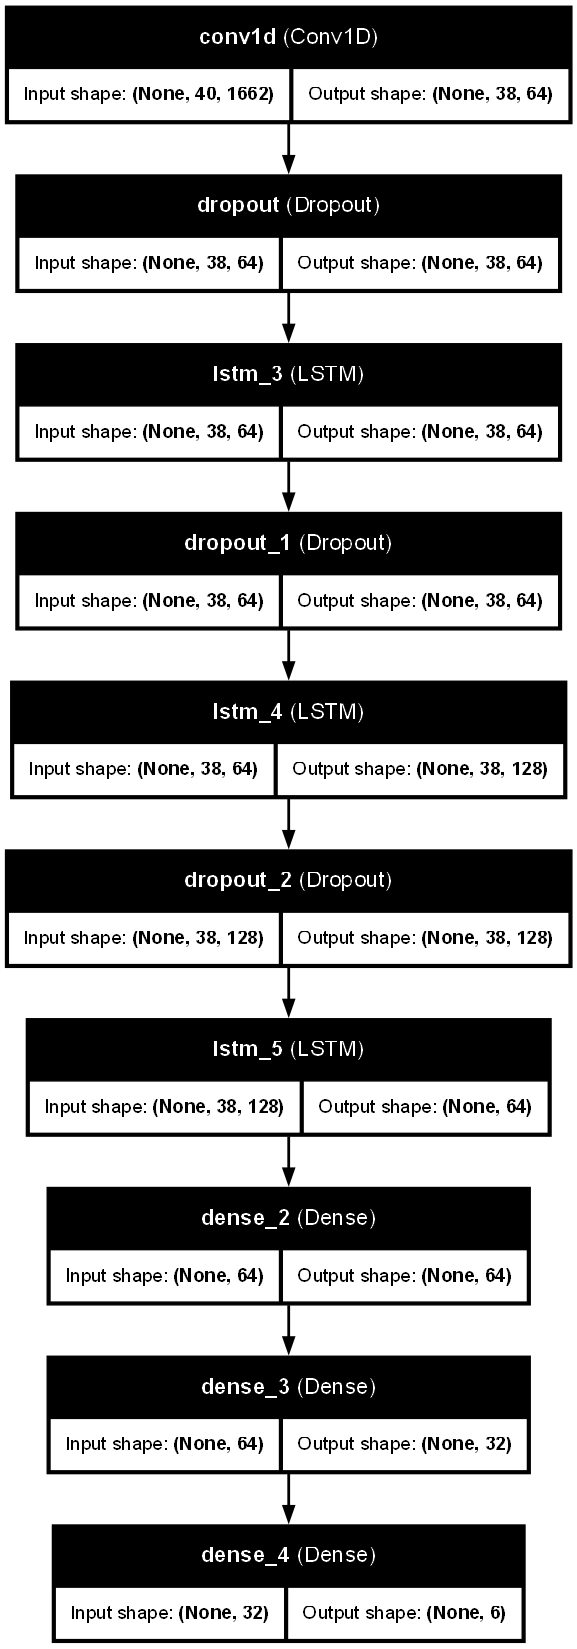

In [30]:
from tensorflow.keras.utils import plot_model

# 生成并保存模型架构图，设置dpi参数来调整图像分辨率
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=100)



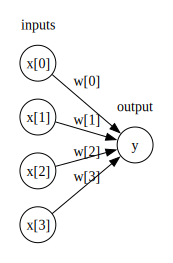

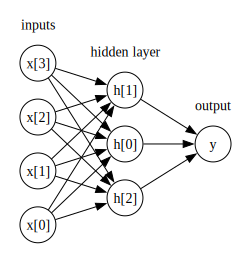

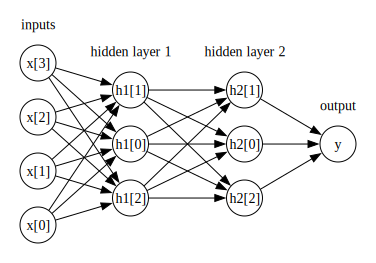

In [3]:
import mglearn
from IPython.display import display

# Displaying plots for different logistic regression models
display(mglearn.plots.plot_logistic_regression_graph())
display(mglearn.plots.plot_single_hidden_layer_graph())
display(mglearn.plots.plot_two_hidden_layer_graph())


In [2]:
import subprocess

result = subprocess.run(['dot', '-version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(result.stdout.decode())


### 8.Make Predictions

In [61]:
res = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [62]:
actions[np.argmax(res[4])]

'玩'

In [63]:
actions[np.argmax(y_test[4])]

'玩'

### 9. Save Weights

In [11]:
from tensorflow.keras.models import load_model

In [27]:

model.save('手语数据训练参数.h5')


In [13]:
del model

NameError: name 'model' is not defined

In [19]:
model = load_model('手语数据训练参数.h5')

In [20]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 38, 64)              │         319,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 38, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 38, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 38, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 38, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 38, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 506,856 (1.93 MB)

 Trainable params: 506,854 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### 10.评估使用混淆矩阵和精度

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[18,  0],
        [ 0,  2]],

       [[17,  0],
        [ 0,  3]],

       [[16,  0],
        [ 0,  4]],

       [[18,  1],
        [ 0,  1]],

       [[15,  0],
        [ 0,  5]],

       [[15,  0],
        [ 1,  4]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.95

### 10.测试

In [49]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

# 动态生成颜色
def generate_colors(num_actions):
    """
    根据动作数量动态生成颜色。
    每种颜色在 RGB 空间中均匀分布。
    """
    import random
    random.seed(42)
    colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(num_actions)]
    return colors

# 使用 PIL 渲染中文的 prob_viz 函数
def prob_viz(res, actions, input_frame, colors=None, font_path="C:/Windows/Fonts/simhei.ttf", font_size=20):
    """
    可视化概率和动作，支持中文。
    参数:
    - res: 每个动作的预测概率 (如 [0.8, 0.1, 0.1])。
    - actions: 动作列表 (如 ["跑步", "跳跃", "站立"])。
    - input_frame: OpenCV 图像帧。
    - colors: 动作对应的颜色列表 (可选)。
    - font_path: 字体路径，用于支持中文渲染。
    - font_size: 字体大小。
    """
    output_frame = input_frame.copy()
    
    # 确保 colors 和 actions 数量一致
    num_actions = len(actions)
    if colors is None or len(colors) < num_actions:
        colors = generate_colors(num_actions)
    
    # 转换为 PIL 图像
    img_pil = Image.fromarray(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype(font_path, font_size)

    # 绘制概率条和动作名称
    for num, prob in enumerate(res):
        # 绘制矩形表示概率
        start_x, start_y = 0, 60 + num * 40
        end_x = int(prob * 300)
        end_y = 90 + num * 40
        cv2.rectangle(output_frame, (start_x, start_y), (end_x, end_y), colors[num], -1)
        
        # 使用 PIL 绘制中文
        draw.text((10, end_y + 5), f"{actions[num]} ({prob:.2f})", font=font, fill=(255, 255, 255))

    # 转回 OpenCV 格式
    output_frame = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return output_frame


In [69]:
res

array([[2.45106500e-03, 3.07532580e-04, 9.96126711e-01, 6.83079474e-04,
        4.70861451e-05, 3.84612445e-04],
       [7.41638418e-04, 9.98684824e-01, 1.95053308e-05, 2.27252007e-04,
        2.68493977e-06, 3.24104476e-04],
       [7.41066760e-04, 4.63737342e-05, 9.98119652e-01, 9.67598928e-04,
        2.29491106e-05, 1.02313679e-04],
       [1.63473480e-03, 1.57759462e-06, 7.67647216e-05, 1.03140519e-04,
        9.94224489e-01, 3.95923480e-03],
       [9.42909494e-02, 2.20477159e-04, 9.57891694e-04, 1.96180567e-02,
        3.00689344e-03, 8.81905735e-01],
       [3.37345488e-02, 5.42341440e-04, 7.48571148e-03, 9.41547275e-01,
        6.00969186e-04, 1.60891116e-02],
       [1.31386821e-03, 1.25367592e-06, 6.70777517e-05, 8.24001108e-05,
        9.94510651e-01, 4.02478268e-03],
       [1.84961478e-03, 1.06725216e-04, 5.86366259e-05, 2.25092721e-04,
        4.72325124e-02, 9.50527430e-01],
       [9.87842560e-01, 1.15364115e-03, 2.59799743e-03, 6.69892598e-03,
        2.02270166e-04, 

In [64]:
image

array([[[245, 117,  16],
        [245, 117,  16],
        [245, 117,  16],
        ...,
        [245, 117,  16],
        [245, 117,  16],
        [245, 117,  16]],

       [[245, 117,  16],
        [245, 117,  16],
        [245, 117,  16],
        ...,
        [245, 117,  16],
        [245, 117,  16],
        [245, 117,  16]],

       [[245, 117,  16],
        [245, 117,  16],
        [245, 117,  16],
        ...,
        [245, 117,  16],
        [245, 117,  16],
        [245, 117,  16]],

       ...,

       [[ 80,  72,  65],
        [ 79,  71,  64],
        [ 78,  70,  63],
        ...,
        [135, 141, 140],
        [132, 138, 137],
        [132, 138, 137]],

       [[ 83,  75,  68],
        [ 80,  72,  65],
        [ 79,  71,  64],
        ...,
        [137, 143, 142],
        [133, 139, 138],
        [132, 138, 137]],

       [[ 72,  64,  57],
        [ 73,  65,  58],
        [ 77,  69,  62],
        ...,
        [140, 146, 145],
        [135, 141, 140],
        [133, 139, 138]]

In [74]:
sequence.reverse()

In [75]:
sequence.append('def')

In [76]:
sequence.reverse()

In [80]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.90
from PIL import ImageFont, ImageDraw, Image
# 读取字体

font_path = "C:/Windows/Fonts/simhei.ttf"  # 替换为实际字体路径
font = ImageFont.truetype(font_path, 32)  # 设置字体和大小
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-40:]
        
 
        
        if len(sequence) == 40:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
             # 显示概率可视化
            image = prob_viz(res, actions, image)
            # 使用 PIL 绘制中文文本
            img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 转换为 PIL 格式
            draw = ImageDraw.Draw(img_pil)

                    # 绘制中文和英文文本
            if sentence:
                draw.text((120, 200), '实时测试', font=font, fill=(0, 255, 0))
                draw.text((15, 12), f'动作: {sentence[-1]}', font=font, fill=(0, 0, 255))
                draw.text((3, 30), ' '.join(sentence), font=font, fill=(255, 255, 255)) 
            # 转回为 OpenCV 格式
            image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

        
             
       
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [114]:
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

# 创建一个 OpenCV 图像
image = np.zeros((300, 500, 3), dtype=np.uint8)

# 转换为 PIL 图像
img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 绘制文本
draw = ImageDraw.Draw(img_pil)
font = ImageFont.truetype("C:/Windows/Fonts/SimHei.ttf", 32)
draw.text((50, 100), "你好，OpenCV！", font=font, fill=(255, 255, 255))  # 白色字体

# 转换回 OpenCV 图像
image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# 显示图像
cv2.imshow("Image with Chinese Text", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [115]:
res[np.argmax(res)] > threshold

True

### 11.修改动作，增加如谢谢，对不起等中国手语cslr